[출처](https://www.datamanim.com/dataset/ADPpb/00/27.html)  
[참고1](https://www.kaggle.com/code/johyunkang/adp-27/notebook)  
[참고2](https://amaruak00.github.io/2022/12/17/adp27th.html)

# 머신러닝
## 1. 데이터 확인 및 전처리

### (1) EDA 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [26]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
Amount    0
Class     0
dtype: int64

In [27]:
df.Class.value_counts()

0    993
1    200
Name: Class, dtype: int64

In [37]:
# Class 별 각 컬럼의 개수
class_grp_count = df.drop(columns=['Time']).groupby('Class').count()
class_grp_mean = df.drop(columns=['Time']).groupby('Class').mean()

display(class_grp_count)
display(class_grp_mean)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,
0,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993
1,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,
0,0.018917,-0.011237,-0.045308,0.044207,0.086018,-0.045132,0.009048,-0.014774,-0.032517,0.005167,0.038878,0.003587,0.023074,0.024501,0.017683,0.043565,0.035805,85.187613
1,-4.597659,3.299139,-6.624207,4.420185,-2.867841,-1.469696,-5.130353,0.938431,-2.501269,-5.419653,3.722054,-6.067424,-0.043141,-7.090834,0.026921,-3.971442,-6.564245,107.246700


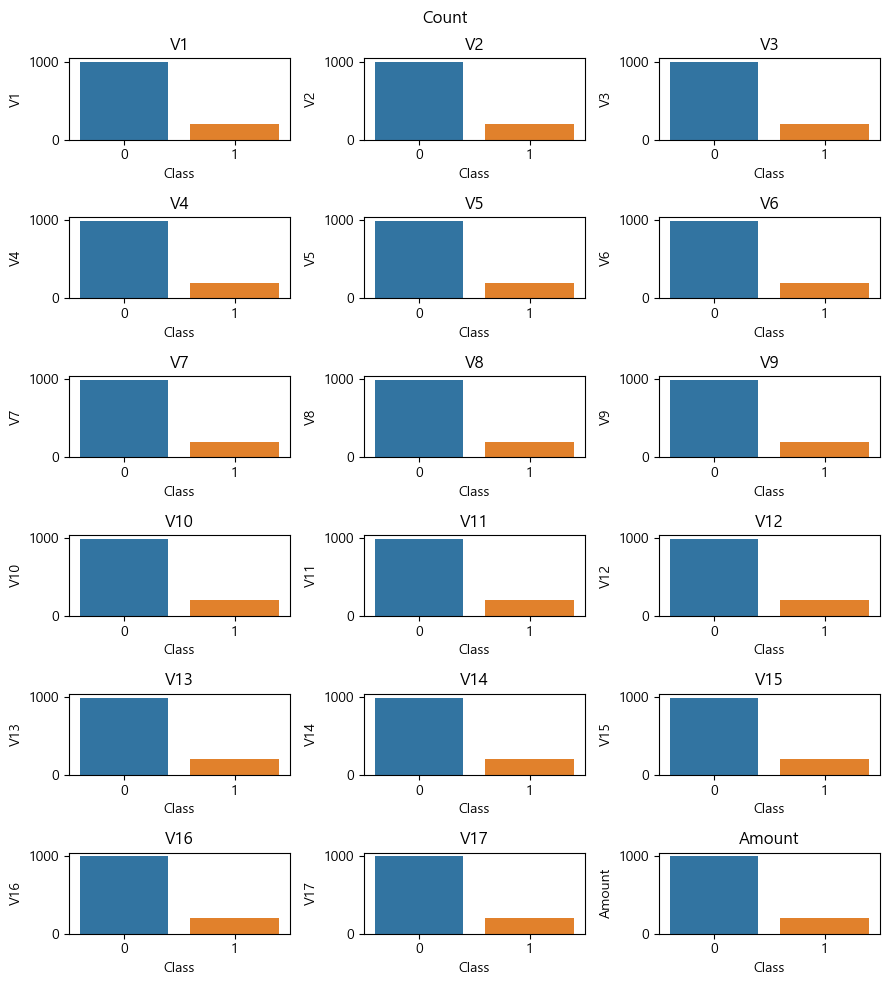

In [60]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(9, 10))
features = df.drop(columns=['Time', 'Class']).columns

for idx, feature in zip(range(18), features):
    row = int(idx / 3)
    col = idx % 3
    sns.barplot(data = class_grp_count.iloc[:, idx].to_frame(), x = class_grp_count.index, y = class_grp_count.columns[idx],
               ax=ax[row][col])
    ax[row][col].set_title(class_grp_count.columns[idx])
    
plt.suptitle('Count')
plt.tight_layout()
plt.show()

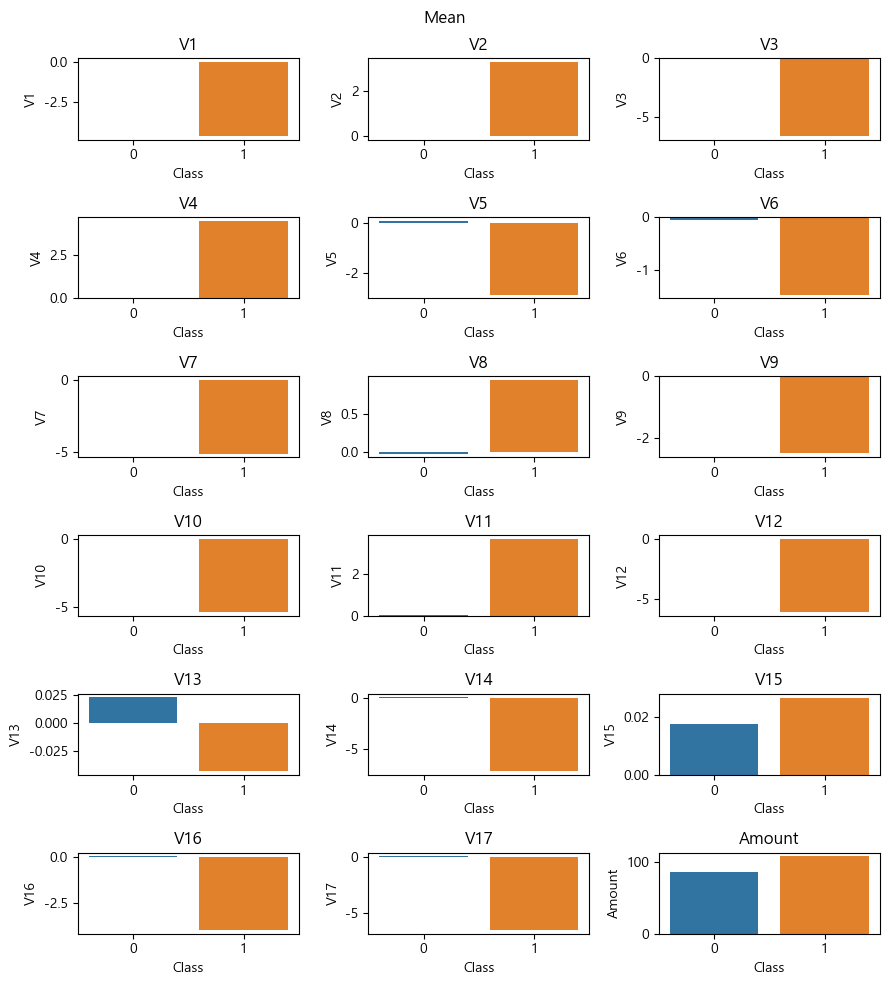

In [59]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(9, 10))
features = df.drop(columns=['Time', 'Class']).columns

for idx, feature in zip(range(18), features):
    row = int(idx / 3)
    col = idx % 3
    sns.barplot(data = class_grp_mean.iloc[:, idx].to_frame(), x = class_grp_mean.index, y = class_grp_mean.columns[idx],
               ax=ax[row][col])
    ax[row][col].set_title(class_grp_mean.columns[idx])
    
plt.suptitle('Mean')
plt.tight_layout()
plt.show()

[해석]
- Class별 독립변수들의 Class별 개수는 정상거래(0)가 많음.
- 하지만 평균은 이상거래(1)의 값이 더 큼.
- 특히 금액(Amount)은 거래건수는 이상거래의 수가 적지만, 평균값이 정상거래 보다 더 커 이상거래에 큰 금액이 분포한다고 유추 가능

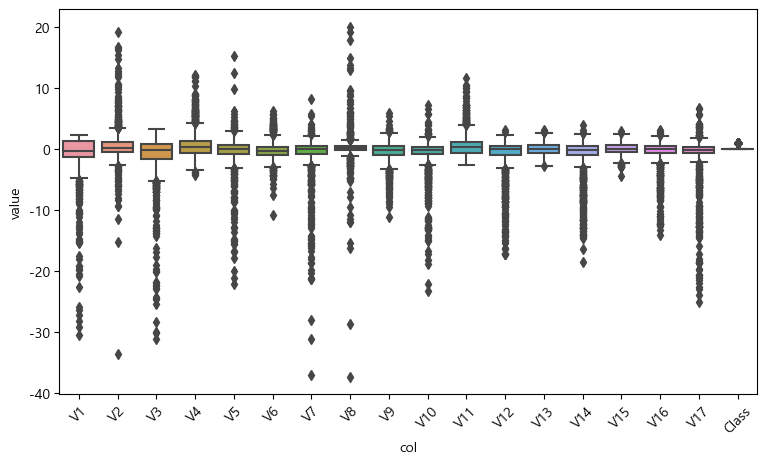

In [5]:
plt.figure(figsize=(9, 5))
X_box= df.copy().drop(columns=['Time', 'Amount'])
X_melt = pd.melt(X_box, var_name='col', value_name='value')
sns.boxplot(data=X_melt, x='col', y='value')
plt.xticks(rotation=45)
plt.show()

[해석]
- 종속변수는 int형, 독립변수는 float형으로 이루어져 있음.
- 모든 컬럼에 결측치는 발견되지 않았음.
- Class 컬럼에서 0은 933개, 1은 200개이므로 데이터 불균형 문제가 존재하기에 오버샘플링 및 언더 샘플링 기법을 활용해야 할 수 있음.
- Amount컬럼 값의 범위가 다른 컬럼들과 달리 크므로 모델 구현 시에 스케일링을 진행해야 할 수 있음.
- 상자그림에서 각 변수에 많은 이상치들이 보이며, 이 이상치들이 사기행위가 들어간 데이터일 활률이 높아 보임.

### (2) 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

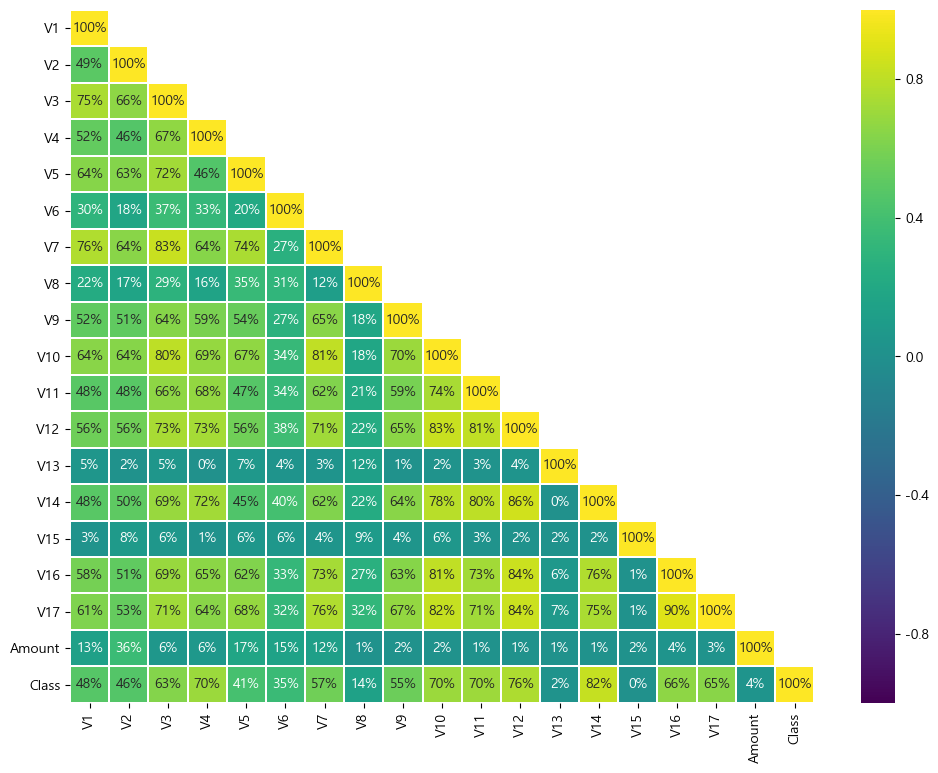

In [81]:
df_corr = df.drop(['Time'], axis=1).corr().abs() # 절댓값 처리
up_mask = np.triu(np.ones(df_corr.shape), k=1).astype(np.bool_)

plt.figure(figsize=(12, 9))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, fmt='.0%', cmap='viridis', linewidth=.3, mask=up_mask)
plt.show()

In [82]:
# corr 값이 큰 상위 피처 출력 
corr_unstack = df_corr.unstack()
df_cor = pd.DataFrame(corr_unstack[corr_unstack < 1].sort_values(ascending=False), columns=['corr'])[:23]
display(df_cor.style.background_gradient(cmap='viridis'))

# 상위 피처 컬럼명
top_corr_cols = df_cor.reset_index()['level_0'].unique()
print('top_corr_cols:', top_corr_cols)

,,corr
V16,V17,0.902381
V17,V16,0.902381
V12,V14,0.855828
V14,V12,0.855828
V12,V16,0.843644
V16,V12,0.843644
V17,V12,0.840627
V12,V17,0.840627
V7,V3,0.830995
V3,V7,0.830995


top_corr_cols: ['V16' 'V17' 'V12' 'V14' 'V7' 'V3' 'V10' 'Class' 'V11']


[해석]
- 독립변수들 간에 강한 상관간계를 나타내는 경우는 'V16' 'V17' 'V12' 'V14' 'V7' 'V3' 등이 있음.
- 많은 변수들이 상관관계가 높아 다중공선성의 문제가 있기에 차원 축소 방법을 고려할 필요가 있음.

## 2. 차원축소 (1번이어서)

### (1) 차원축소 방법 2가지 이상 비교하고 한가지 선택
- 주성분분석: 데이터에 여러 변수들이 있을 때, 서로 상관성이 높은 변수들의 선형결합으로 이루어진 주성분이라는 새로운 변수를 만들어 변수를 요약하고 축소하는 기법임, 변수의 성격을 알 수 없는 해당 데이터에 어울리는 분석임.
- 요인분석: 수만은 변수에서 유사한 항목들끼리 묶어서 처리하는 기법으로 이 때는 종속변수와 독립변수의 개념이 없으며, 모든 변수들 간의 관계를 분석함으로써 공통요인을 분석가의 판단으로 묶어서 처리할 수 있음.

### (2) 추천한 한 가지를 실제로 수행하고 선택한 이유 설명
- 해당 데이터처럼 변수들의 성격을 알 수 없을 때에는 분석가의 주관적 견해가 들어갈 수 있는 요인분석은 사용하기 어려움.
- 주성분 분석은 데이터 간의 선형 관계만을 가지고 판단하므로 주어진 데이터를 최대한 보존하여 저차원의 데이터를 얻을 수 있으므로 지금과 같이 가명처리 되어 있는 변수에 적합한 기법임.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

# scale 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns = X.columns)
display(df_scaled.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
0,0.503810,-0.187750,0.373186,0.229840,-0.019702,-0.380859,0.312343,-0.136123,0.302269,0.325996,-0.594823,0.302295,-0.479024,0.501785,1.086837,0.359263,0.165482,0.002337
1,-0.430077,0.528863,-0.118149,1.373417,-0.041840,-0.758217,-0.496251,0.504602,-1.396977,-0.643828,1.301226,-0.629523,-0.599428,-0.966447,0.408199,-0.225360,-0.461643,-0.403936
2,-0.325079,0.443474,0.623589,-0.501076,0.099587,1.827850,-0.298295,-2.158200,0.746165,0.365223,-0.317845,0.641274,-0.038644,0.236600,-0.543375,0.398318,0.222587,-0.330361
3,-0.632056,-1.389898,0.572460,0.644391,0.654951,-0.518180,0.347001,-0.086144,0.105471,0.022640,-0.547398,0.170605,0.656027,-0.162168,2.183059,0.571452,0.438284,2.000074
4,0.009932,0.035761,0.469539,-0.341662,1.009673,2.757848,0.158976,0.382410,-0.090500,0.309553,-0.459637,0.210215,0.095864,0.419883,1.987865,0.398455,0.097851,-0.303958


In [3]:
# PCA 진행
pca3 = PCA(n_components=10)
df_pca3 = pca3.fit_transform(df_scaled)
df_pca3 = pd.DataFrame(df_pca3)

print('분산 설명력', pca3.explained_variance_ratio_)

display(df_pca3.head())

분산 설명력 [0.51361612 0.07117263 0.06966029 0.06400925 0.05314122 0.04897359
 0.03882312 0.02556334 0.02437357 0.0205256 ]


,0,1,2,3,4,5,6,7,8,9
0,-0.997076,-0.207832,-0.610750,-0.394244,0.900161,0.212324,0.302236,0.109713,-0.124567,-0.365226
1,2.461293,-0.731143,-0.515611,-1.010191,0.148879,-0.311254,-0.065655,0.933591,-0.441115,0.342995
2,-1.358729,-0.122716,2.538037,0.037120,0.007321,1.221959,0.173704,-0.393710,0.579051,0.126220
3,-0.855668,1.903671,-1.886663,-1.051973,0.555639,1.137678,1.433891,0.693638,-0.051970,0.235401
4,-1.395062,0.079289,0.019840,-0.098769,1.303101,2.309902,-1.522836,0.639306,0.100875,1.269287


In [4]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.plot(pca.explained_variance_ratio_, 'o-', color='blue')
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, color='red')
    
    ax.set_xlabel("Principal Component")
    ax.set_ylabel('Variance Explained')
    plt.title('scree plot')
    plt.show()

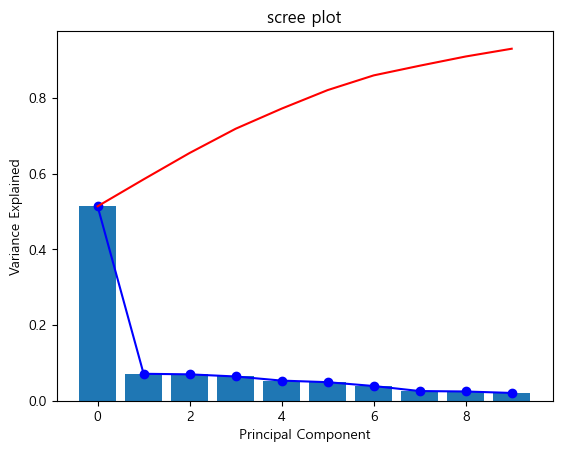

In [5]:
scree_plot(pca3)

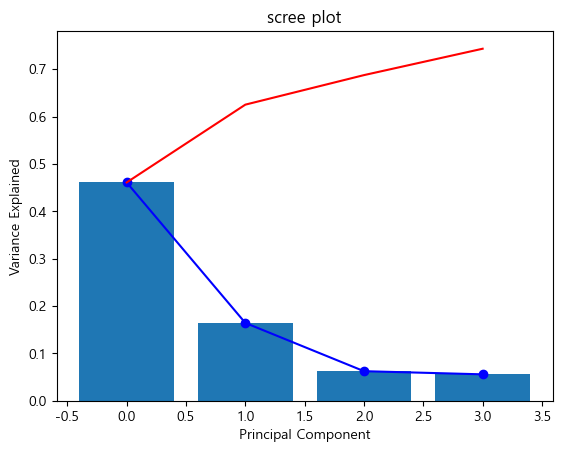

In [188]:
pca4 = PCA(n_components=4)
pca4.fit(df_scaled)
scree_plot(pca4)

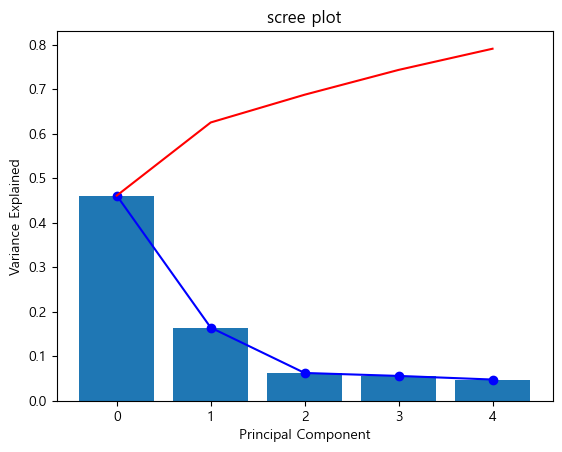

In [189]:
pca5 = PCA(n_components=5)
pca5.fit(df_scaled)
scree_plot(pca5)

[해석]
- scree plot으로 확인한 결과, 적절한 컴포넌트 개수는 엘보우 그래프에 의한 2개가 가장 적잘한 것 같음.

## 3. 오버샘플링/언더샘플링 (1번이어서)

### (1) 오버샘플링과 언더샘플링 장단점 비교 및 선택
1. 오버샘플링
    - 소수의 레이블을 가진 데이터를 샘플링하여 다수의 데이터세트가 가진 레이블의 수 수준으로 감소하는 기법임. 데이터 손실이 없기에 언더 샘플링보다 성능이 유리함. 대표적으로 랜덤 오버 샘플링과 KNN을 이용한 SMOTE 기법이 있음.
    - 랜덤 오버 샘플링은 소수 클래스의 정보를 복제하여 다수 클래스의 크기에 맞추는 기법이며, 오버피팅의 우려가 있음.
    - SMOTE는 KNN을 이용하여 최근접 이웃의 거리 계산을 통해 K개의 중간 지점의 데이터를 생성함. 오버피팅을 막을 수 있지만 새로운 데이터나 작은 데이터세트에서는 사용하기 어려움.
    
1. 언더 샘플링
    - 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소하는 기법임. 데이터 불균형 문제를 피할 수 있지만 데이터 수가 급격히 줄어들어 학습 성능이 떨어질 수 있음.
    
데이터 수가 크므로 본 분석에서는 오버샘플링 기법을 이용함.

### (2) 모델 구현 및 위에서 선택한 2가지 이상의 알고리즘으로 모델을 비교하고 성능을 측정

In [6]:
def model_oversampling(model, X_train, y_train):
    X_train_sample, y_train_sample = model.fit_resample(X_train, y_train)
    print('=======', model.__class__, '=====')
    print('샘플링 적용 전 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
    print('샘플링 적용 후 피처/레이블 데이터 세트:', X_train_sample.shape, y_train_sample.shape)
    y_train_sample_series = pd.Series(y_train_sample)
    print('샘플링 적용 후 레이블 값 분포 :\n', y_train_sample_series.value_counts())
    return X_train_sample, y_train_sample

In [8]:
# Amount 만 스케일링
amount_n = np.log1p(df['Amount']) # 자연로그 값을 계산
df_scaled['Amount'] = amount_n

# X, y 분할
X = df_scaled.copy()
y = df['Class']

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)

# 오버샘플링 구현
from imblearn.over_sampling import RandomOverSampler, SMOTE
random_over = RandomOverSampler(random_state=1)
smote = SMOTE(random_state=1)
X_train_random, y_train_random=model_oversampling(random_over, X_train, y_train)
X_train_sm, y_train_sm=model_oversampling(smote, X_train, y_train)

======= <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'> =====
샘플링 적용 전 피처/레이블 데이터 세트: (835, 18) (835,)
샘플링 적용 후 피처/레이블 데이터 세트: (1390, 18) (1390,)
샘플링 적용 후 레이블 값 분포 :
 1    695
0    695
dtype: int64
======= <class 'imblearn.over_sampling._smote.SMOTE'> =====
샘플링 적용 전 피처/레이블 데이터 세트: (835, 18) (835,)
샘플링 적용 후 피처/레이블 데이터 세트: (1390, 18) (1390,)
샘플링 적용 후 레이블 값 분포 :
 1    695
0    695
dtype: int64


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


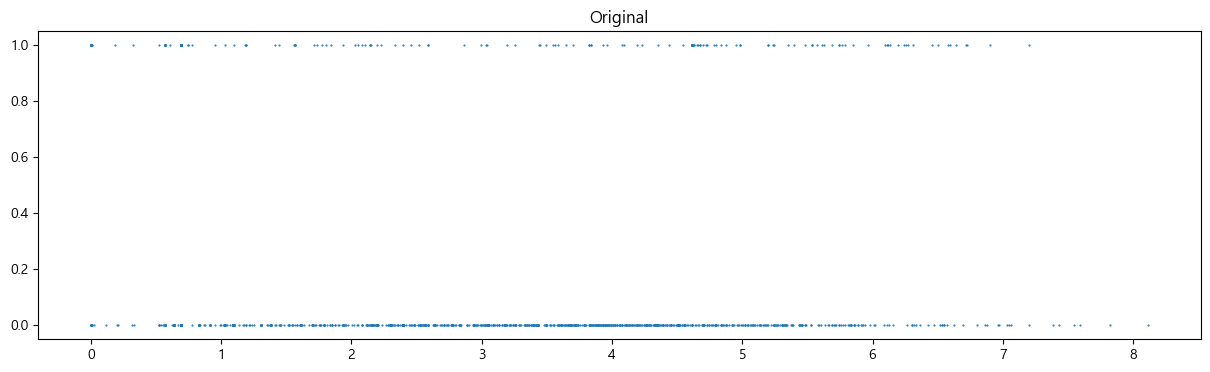

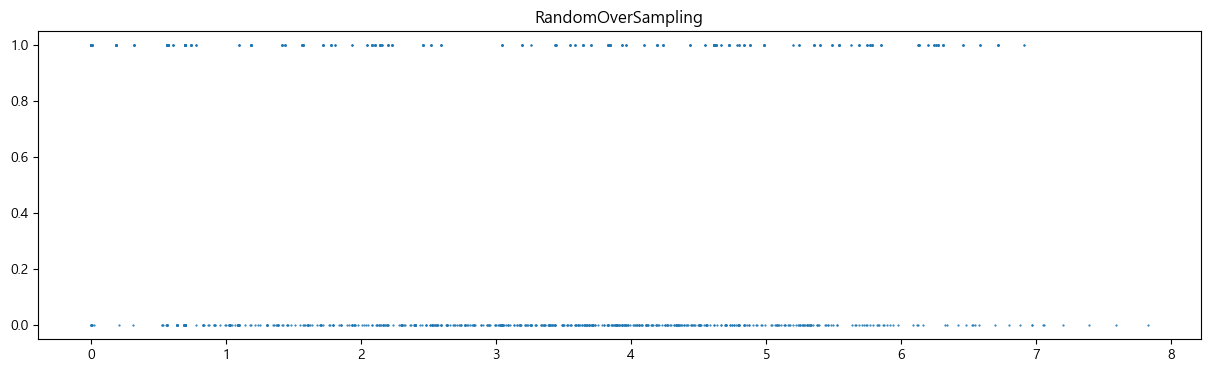

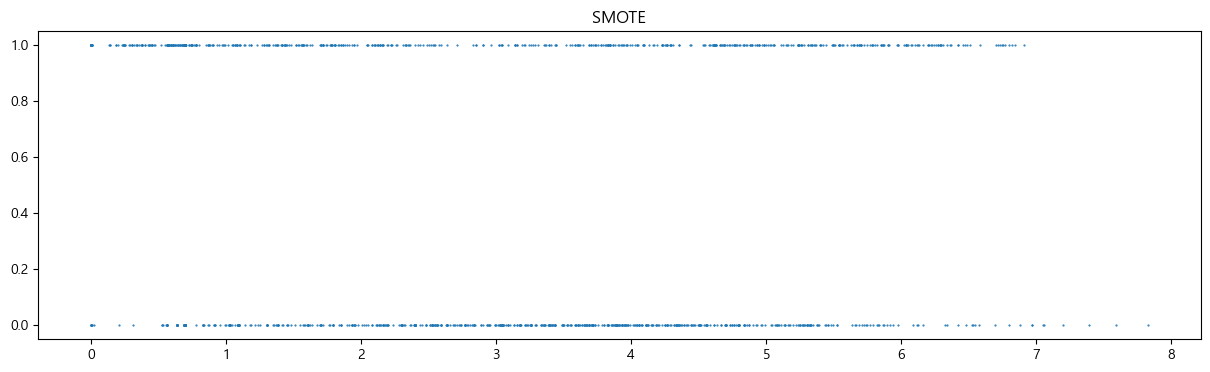

In [9]:
df_random=pd.concat([pd.DataFrame(X_train_random, columns=df_scaled.columns), 
                     pd.DataFrame(y_train_random, columns=['Class'])], axis=1)
df_sm=pd.concat([pd.DataFrame(X_train_sm, columns=df_scaled.columns), 
                 pd.DataFrame(y_train_sm, columns=['Class'])], axis=1)

plt.figure(figsize=(15,4))
plt.title('Original')
plt.scatter(df_scaled['Amount'], df['Class'], s=0.3)
plt.show()

plt.figure(figsize=(15,4))
plt.title('RandomOverSampling')
plt.scatter(df_random['Amount'], df_random['Class'], s=0.3)
plt.show()

plt.figure(figsize=(15,4))
plt.title('SMOTE')
plt.scatter(df_sm['Amount'], df_sm['Class'], s=0.3)
plt.show()

[해석]
- 오버샘플링 결과 원본에 비해 이상 거래의 수가 증가하였음.
- 랜덤 오버 샘플링 대비 SMOTE에서 더 다양한 차원의 샘플링 생성되었음.

### (3) 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석

In [10]:
# IF의 predict는 이상치를 -1, 정상값을 1로 반환해서
# y와 동일하게 정상값 0, 이상값 1로 변경
def label_mapping(x) :
    if x == 1 :
        return 0
    elif x== -1 :
        return 1
    else :
        return x

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

def evaluate_model(model, train_x, train_y, test_x, test_y):
    
    x_train_copy = train_x.copy()
    y_train_copy = train_y.copy()
    x_test_copy = test_x.copy()
    y_test_copy = test_y.copy()
    
    start = time.time()
    model.fit(x_train_copy, y_train_copy)
    end = time.time() - start
    
    pred = model.predict(x_test_copy)
    
    from sklearn.ensemble import IsolationForest
    if isinstance(model, IsolationForest) :
        pred = np.array(list(map(label_mapping, pred)))

    # calculate metrics
    accuracy_test = accuracy_score(y_test_copy, pred)
    precision_test= precision_score(y_test_copy, pred)
    recall_test = recall_score(y_test_copy, pred)
    f1_test = f1_score(y_test_copy, pred)
    auc_test = roc_auc_score(y_test_copy, pred)

    rt_tuple = np.array([accuracy_test, precision_test, recall_test, \
                f1_test, auc_test, end])
    rt_arr = np.array(rt_tuple).reshape(1, -1)
    return pd.DataFrame(rt_arr, columns=['accuracy', 'precision', 'recall' \
                                        , 'f1', 'auc', 'time'])

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(y_true, y_pred_prob) :
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (AUC=%0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Charateristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(random_state=1)
rf = RandomForestClassifier(random_state=1)

# LR 
df_lr_org = evaluate_model(lr, X_train, y_train, X_test, y_test)
df_lr_random = evaluate_model(lr, X_train_random, y_train_random, X_test, y_test)
df_lr_smote = evaluate_model(lr, X_train_sm, y_train_sm, X_test, y_test)
# RF
df_rf_org = evaluate_model(rf, X_train, y_train, X_test, y_test)
df_rf_random = evaluate_model(rf, X_train_random, y_train_random, X_test, y_test)
df_rf_smote = evaluate_model(rf, X_train_sm, y_train_sm, X_test, y_test)

df_result = pd.concat([df_lr_org, df_rf_org, df_lr_random, df_rf_random, df_lr_smote, df_rf_smote], axis=0)
df_result.index=['LR_ORG', 'RF_ORG', 'LR_random', 'RF_random', 'LR_smote', 'RF_smote']
display(df_result)

,accuracy,precision,recall,f1,auc,time
LR_ORG,0.974860,1.000000,0.850000,0.918919,0.925000,0.056846
RF_ORG,0.972067,1.000000,0.833333,0.909091,0.916667,0.421466
LR_random,0.972067,0.931034,0.900000,0.915254,0.943289,0.020942
RF_random,0.974860,0.981132,0.866667,0.920354,0.931655,0.545226
LR_smote,0.972067,0.931034,0.900000,0.915254,0.943289,0.026973
RF_smote,0.977654,0.981481,0.883333,0.929825,0.939989,0.634171


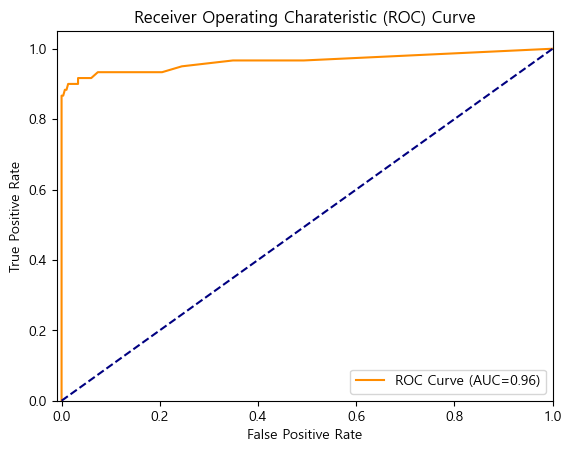

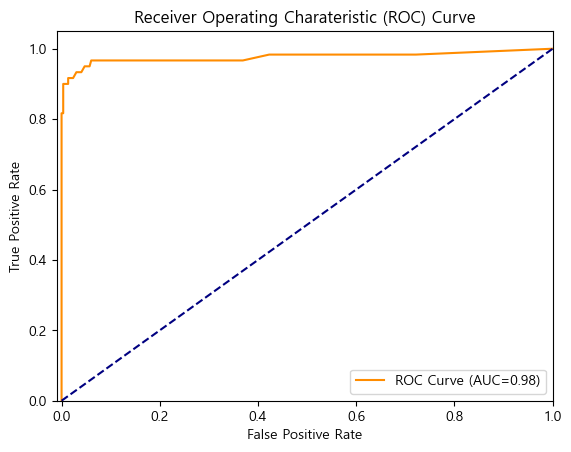

In [21]:
rf.fit(X_train, y_train)
y_pred_prob = rf.predict_proba(X_test)[:, 1]
plot_roc(y_test, y_pred_prob)

rf.fit(X_train_sm, y_train_sm)
y_pred_prob = rf.predict_proba(X_test)[:, 1]
plot_roc(y_test, y_pred_prob)

In [27]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, rf.predict(X_test)))

tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test)).ravel()
print(f'TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}')

[[297   1]
 [  7  53]]
TN:297, FP:1, FN:7, TP:53


[해석]  
모델학습 시간은 LogisticRegression에 비해 RandomForest 가 평균적으로 더 오래 걸림. 그러나 정확도를 비롯한 AUC 점수까지 모두 RandomForest 가 더 높게 나옴.
RandomSampling 에 비해 SMOTE를 통해 더 높은 점수를 산출할 수 있음.

In [23]:
# # 0. 원본 데이터 활용
# from sklearn.metrics import plot_roc_curve
# from sklearn.ensemble import RandomForestClassifier
# rf_clf = RandomForestClassifier(random_state=1)
# rf_clf.fit(X_train, y_train)

# plot_roc_curve(rf_clf, X_test, y_test);

In [24]:
# # 1. 랜덤 오버 샘플링

# from sklearn.metrics import plot_roc_curve
# from sklearn.ensemble import RandomForestClassifier
# rf_clf_ro = RandomForestClassifier(random_state=1)
# rf_clf_ro.fit(X_train_random, y_train_random)

# plot_roc_curve(rf_clf_ro, X_test, y_test);

In [25]:
# # 2. smote 기법

# from sklearn.metrics import plot_roc_curve
# from sklearn.ensemble import RandomForestClassifier
# rf_clf_sm = RandomForestClassifier(random_state=1)
# rf_clf_sm.fit(X_train_sm, y_train_sm)

# plot_roc_curve(rf_clf_sm, X_test, y_test);

<!-- [해석]
- 원본 데이터를 이용한 모델의 성능보다 오버 샘플링 기법 두 가지를 적용한 모델의 성능이 좀더 높았음.
- 또한 랜덤 오버 샘플링보다 SMOTE를 이용한 모델이 성능이 더 높음. -->

## 4. 이상탐지 (1번이어서)

### (1) 이상탐지 모델 2가지 이상 기술, 장/단점 설명
1. Isolation Forest
    - 설명 : 기능과 분할 값을 무작위로 선택하여 데이터를 더 작은 하위 집합으로 분할하는 트리기반 모델. 그 후 관찰을 얼마나 빨리 격리할수 있는지에 따라 이상 점수를 할당함
    - 장점
        - 고차원 데이터 세트에서 잘 작동
        - 빠르고 효율적
        - 데이터 분포에 대한 사전 지식이나 가정이 필요하지 않음
    - 단점
        - 데이터가 고도로 구조화된 경우에는 효과적이지 않음
        - 다중 모달 데이터로 어려움을 겪을 수 있음
1. LOF(Local Outlier Factor)
    - 설명 : 각 관측치의 로컬 밀도를 계산하고 이를 이웃 항목과 비교하여 이상값을 식별하는 밀도 기반 모델
    - 장점
        - 고차원 데이터에서 이상값을 식별하는 데 효과적
        - 복잡한 구조의 데이터 세트에서 잘 작동
        - 글로벌 및 로컬 이상값을 모두 처리할 수 있음
    - 단점
        - 이웃 수와 사용된 거리 메트릭에 민감함
        - 대규모 데이터 세트에서는 계산 비용이 많이 들 수 있음
        - 편향된 분포를 가진 데이터 세트에서 잘못된 긍정을 생성할 수 있음
1. One-class SVM
    - 설명 : 데이터를 원점과 분리하기 위해 데이터를 더 높은 차원의 공간에 매핑하는 커널 기반 모델임. 그런 다음 이상값을 결정 경계에서 가장 멀리 떨어진 관측값으로 식별
    - 장점
        - 고차원 데이터에서 이상값을 식별하는데 효과적
        - 비선형 구조의 데이터 세트에서 잘 작동
        - 글로벌 및 로컬 이상값을 모두 처리할 수 있음
    - 단점
        - 효과적으로 작동하려면 하이퍼파라미터 조정이 필요할 수 있음
        - 커널 공간에서 데이터를 분리할 수 없는 경우 성능이 좋지 않을 수 있음
        - 대규모 데이터 세트에서는 계산 비용이 많이 들 수 있음

### (2) 임시 전처리한 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교

In [28]:
from sklearn.ensemble import IsolationForest

X_train_pca, X_test_pca, y_train_pca, y_test_pca = \
    train_test_split(df_pca3, y, stratify=y, test_size=0.3, random_state=1)

# contamination: 이상값 비율(auto (0.05) 또는 float)
isf = IsolationForest(n_estimators=100, n_jobs=-1, max_samples='auto', contamination=0.17)
isf.fit(X_train_pca, y_train_pca)
y_prob_pca = isf.predict(X_test_pca)
y_prob_pca_map = np.array(list(map(label_mapping, y_prob_pca)))

df_pca_isf = evaluate_model(isf, X_train_pca, y_train_pca, X_test_pca, y_test_pca)
df_pca_isf.index=['PCA_ISF']
df_result_1 = pd.concat([df_result, df_pca_isf], axis=0)
display(df_result_1)

,accuracy,precision,recall,f1,auc,time
LR_ORG,0.974860,1.000000,0.850000,0.918919,0.925000,0.056846
RF_ORG,0.972067,1.000000,0.833333,0.909091,0.916667,0.421466
LR_random,0.972067,0.931034,0.900000,0.915254,0.943289,0.020942
RF_random,0.974860,0.981132,0.866667,0.920354,0.931655,0.545226
LR_smote,0.972067,0.931034,0.900000,0.915254,0.943289,0.026973
RF_smote,0.977654,0.981481,0.883333,0.929825,0.939989,0.634171
PCA_ISF,0.851955,0.549296,0.650000,0.595420,0.771309,0.442976


[해석]
- 정확도, 정밀도, 재현율, F1 스코어 등 모든 점수가 PCA에 비해 SMOET가 더 좋게 나옴.

In [31]:
print('Confusion Matrix PCA ISF')
print(confusion_matrix(y_test_pca, y_prob_pca_map))
tn, fp, fn, tp = confusion_matrix(y_test_pca, y_prob_pca_map).ravel()
print(f'TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}')

print()

print('Confusion Matrix SMOTE')
rf.fit(X_train_sm, y_train_sm)
print(confusion_matrix(y_test, rf.predict(X_test)))
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test)).ravel()
print(f'TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}')

Confusion Matrix PCA ISF
[[269  29]
 [ 20  40]]
TN:269, FP:29, FN:20, TP:40

Confusion Matrix SMOTE
[[297   1]
 [  7  53]]
TN:297, FP:1, FN:7, TP:53


### (3) 데이터분석과 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명
[해석]
- 3번 SMOTE를 통한 분류 모델의 결과가 정확도, 정밀도 등의 모든 평가 점수가 이상탐지 모델에 비해 높게 나옴.
- 또한 이상거래와 정상거래를 반대로 오탐하는 False Positive, False Negative 점수 또한 SMOTE 모델이 더 좋게 나옴.
- 시간이 중요하면 로지스틱분류를 사용하고, 정확도가 더 중요하면 RandomForest 모델을 사용하면 좋을듯 함.

# 통계분석
## 1. 2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [11]:
import numpy as np
value2y = 100_000
value1y = 150_000
value0y = 250_000

div_1 = value1y / value2y
div_2 = value0y / value1y
geo_mean = (div_1 * div_2)**(0.5)
print(round(geo_mean*100, 2), '%')

158.11 %


## 2. 12건의 광고시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [19]:
mu = 15.5
var = 3.2
alpha = 0.9
n=12

import scipy.stats as stats
print('신뢰구간:', stats.t.interval(alpha=alpha, loc=mu, scale=np.sqrt(var/n), df=(n-1)))

신뢰구간: (14.572609067393861, 16.427390932606137)


## 3. 강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

### 1. 귀무가설과 대립가설을 세우시오.
- 귀무가설: 강이 상류인지 하류인지에 따라서 생물 다양성 점수에 차이가 없다.
- 대립가설: 강이 상류인지 하류인지에 따라서 생물 다양성 점수에 차이가 있다.

### 2. 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [20]:
import pandas as pd

df_river = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df_river.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


In [24]:
# 정규성 검정
print('강의 상류에 대한 정규성 검정: ', stats.shapiro(df_river['up']))
print('강의 하류에 대한 정규성 검정: ', stats.shapiro(df_river['down']))

# 대응표본 검정
stats.ttest_rel(df_river['up'],df_river['down'])

강의 상류에 대한 정규성 검정:  ShapiroResult(statistic=0.9635884165763855, pvalue=0.6447697877883911)
강의 하류에 대한 정규성 검정:  ShapiroResult(statistic=0.9821230173110962, pvalue=0.9640804529190063)


Ttest_relResult(statistic=1.2922226959983891, pvalue=0.21262429174344777)

[해석]
- 강의 상류, 하류 모두 정규성을 만족한다고 할 수 있음.
- 대응표본 검정 결과, p-value > 0.05 이므로 귀무가설을 기각할 수 없기에, 강이 상류인지 하류인지에 따라서 생물 다양성 점수에 차이가 없다.

## 4. user_counts를 종속변수로 하는 데이터이다.

### 1) 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오. 또한 백분위 50%로 잡고 회귀계수를 구하시오.)

In [29]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df_user= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
display(df_user.head(3))

formula = 'user_counts ~ temperature + wind + precipitation'
model = smf.quantreg(formula, df_user)
result = model.fit(q=0.5)
print('\n\n')
display(result.summary())

names=result.params[1:].index
values = result.params[1:].values

print('\n\n답안 : 각 회귀 계수. 소수점 2자리 반올림')
for name, val in zip(names, values):
    print(name, ':', round(val, 2))

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Thu, 15 Jun 2023   No. Observations:                 2097
Time:                        21:21:00   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""



답안 : 각 회귀 계수. 소수점 2자리 반올림
temperature : 268.89
wind : -129.41
precipitation : -83.38


### 2) 1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

In [33]:
df_sample = pd.DataFrame(data={'temperature':[10.5], 'wind': [8.2], 'precipitation': [3.5]})
y_predict = result.predict(df_sample)
print('user_counts:', y_predict.values)

user_counts: [7412.23953726]


## 5. 지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

### 1) 귀무가설과 대립가설 설정하라

In [34]:
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
display(df_subway.head(3))

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305


In [35]:
# 9-1 귀무가설과 대립가설 설정하라
print('귀무가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 없다.')
print('대립가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 없지 않다.')

귀무가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 없다.
대립가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 없지 않다.


### 2) 통계량을 구하고, 대립가설 채택여부를 기술하라

In [36]:
# 9-2 통계량을 구하고, 대립가설 채택여부를 기술하라
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'total ~ line * month'
model = ols(formula, df_subway).fit()

display(model.summary())
print('\n\n')
print(anova_lm(model, typ=3))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.1437
Date:                Thu, 15 Jun 2023   Prob (F-statistic):              0.933
Time:                        21:40:35   Log-Likelihood:                -475.01
No. Observations:                  72   AIC:                             958.0
Df Residuals:                      68   BIC:                             967.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1379.3788    121.348     11.367      0.000    1137.233    1621.524
line          24.8561     56.173      0.442      0.660     -87.236     136.948
month          5.3840     16.488      0.327      0.745     -27.517      38.285
line:month    -1.6862      7.632     -0.221      0.826     -16.916      13.544
==============================================================================
Omnibus:                       25.188   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.887
Skew:                           0.749   Prob(JB):                      0.00432
Kurtosis:                       1.824   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""




                  sum_sq    df           F        PR(>F)
Intercept   4.305506e+06   1.0  129.212253  2.239995e-17
line        6.524219e+03   1.0    0.195798  6.595386e-01
month       3.553077e+03   1.0    0.106631  7.450156e-01
line:month  1.626329e+03   1.0    0.048808  8.258132e-01
Residual    2.265841e+06  68.0         NaN           NaN
